In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
import os
from numba import cuda 
plt.style.use("science.mplstyle")


from helpers.composite_helpers import *

In [2]:
sim_color = "#990000"
trans_color = "#674ea7"
dat_color = "#1c4587"

dpi = 800

# Toy model plots

In [3]:
curtains_dir = "/global/home/users/rrmastandrea/CURTAINS_SALAD/"

n_features = 1
dataset_config_string = f"triangle_npoints100000_nfeatures2/"

exp_dir = os.path.join(curtains_dir, dataset_config_string)
data_dir = os.path.join(exp_dir, "data")


context_endpoints = (0, 0.9)


bands_dict = {
              "sb1": [0, .3],
              "sr" : [.3, .6],
              "sb2": [.6, .9],
             }


bands_to_plot = list(bands_dict.keys())

binning_scheme = np.linspace(-3.5, 3.5, 50)

In [4]:
# calculate band rocs

In [5]:
seed = 1

num_layers_BD_sim = 2
num_hidden_features_BD_sim = 16


loc_id_BD_sim = f"BD_sim_Masked_PRQ_AR_{num_layers_BD_sim}layers_{num_hidden_features_BD_sim}hidden_seed{seed}"
BD_sim_training_dir = os.path.join(exp_dir, f"saved_models_{loc_id_BD_sim}/")

num_layers_s2d = 2
num_hidden_features_s2d = 16


loc_id_s2d = f"s2d_Masked_PRQ_AR_{num_layers_s2d}layers_{num_hidden_features_s2d}hidden_seed{seed}"
s2d_training_dir = os.path.join(BD_sim_training_dir, f"saved_models_{loc_id_s2d}/")
s2d_samples_dir = os.path.join(s2d_training_dir, f"npy_samples/")


    
sim_samples = {}
transformed_sim_samples = {}
dat_samples = {}

for band in list(bands_dict.keys()):
    # sim
    sim_samples[band] = np.load(os.path.join(s2d_samples_dir, f"{band}_SIM.npy"))
    # trans sim
    transformed_sim_samples[band] = np.load(os.path.join(s2d_samples_dir, f"{band}_transSIM.npy"))
    # dat
    dat_samples[band] = np.load(os.path.join(s2d_samples_dir, f"{band}_DAT.npy"))

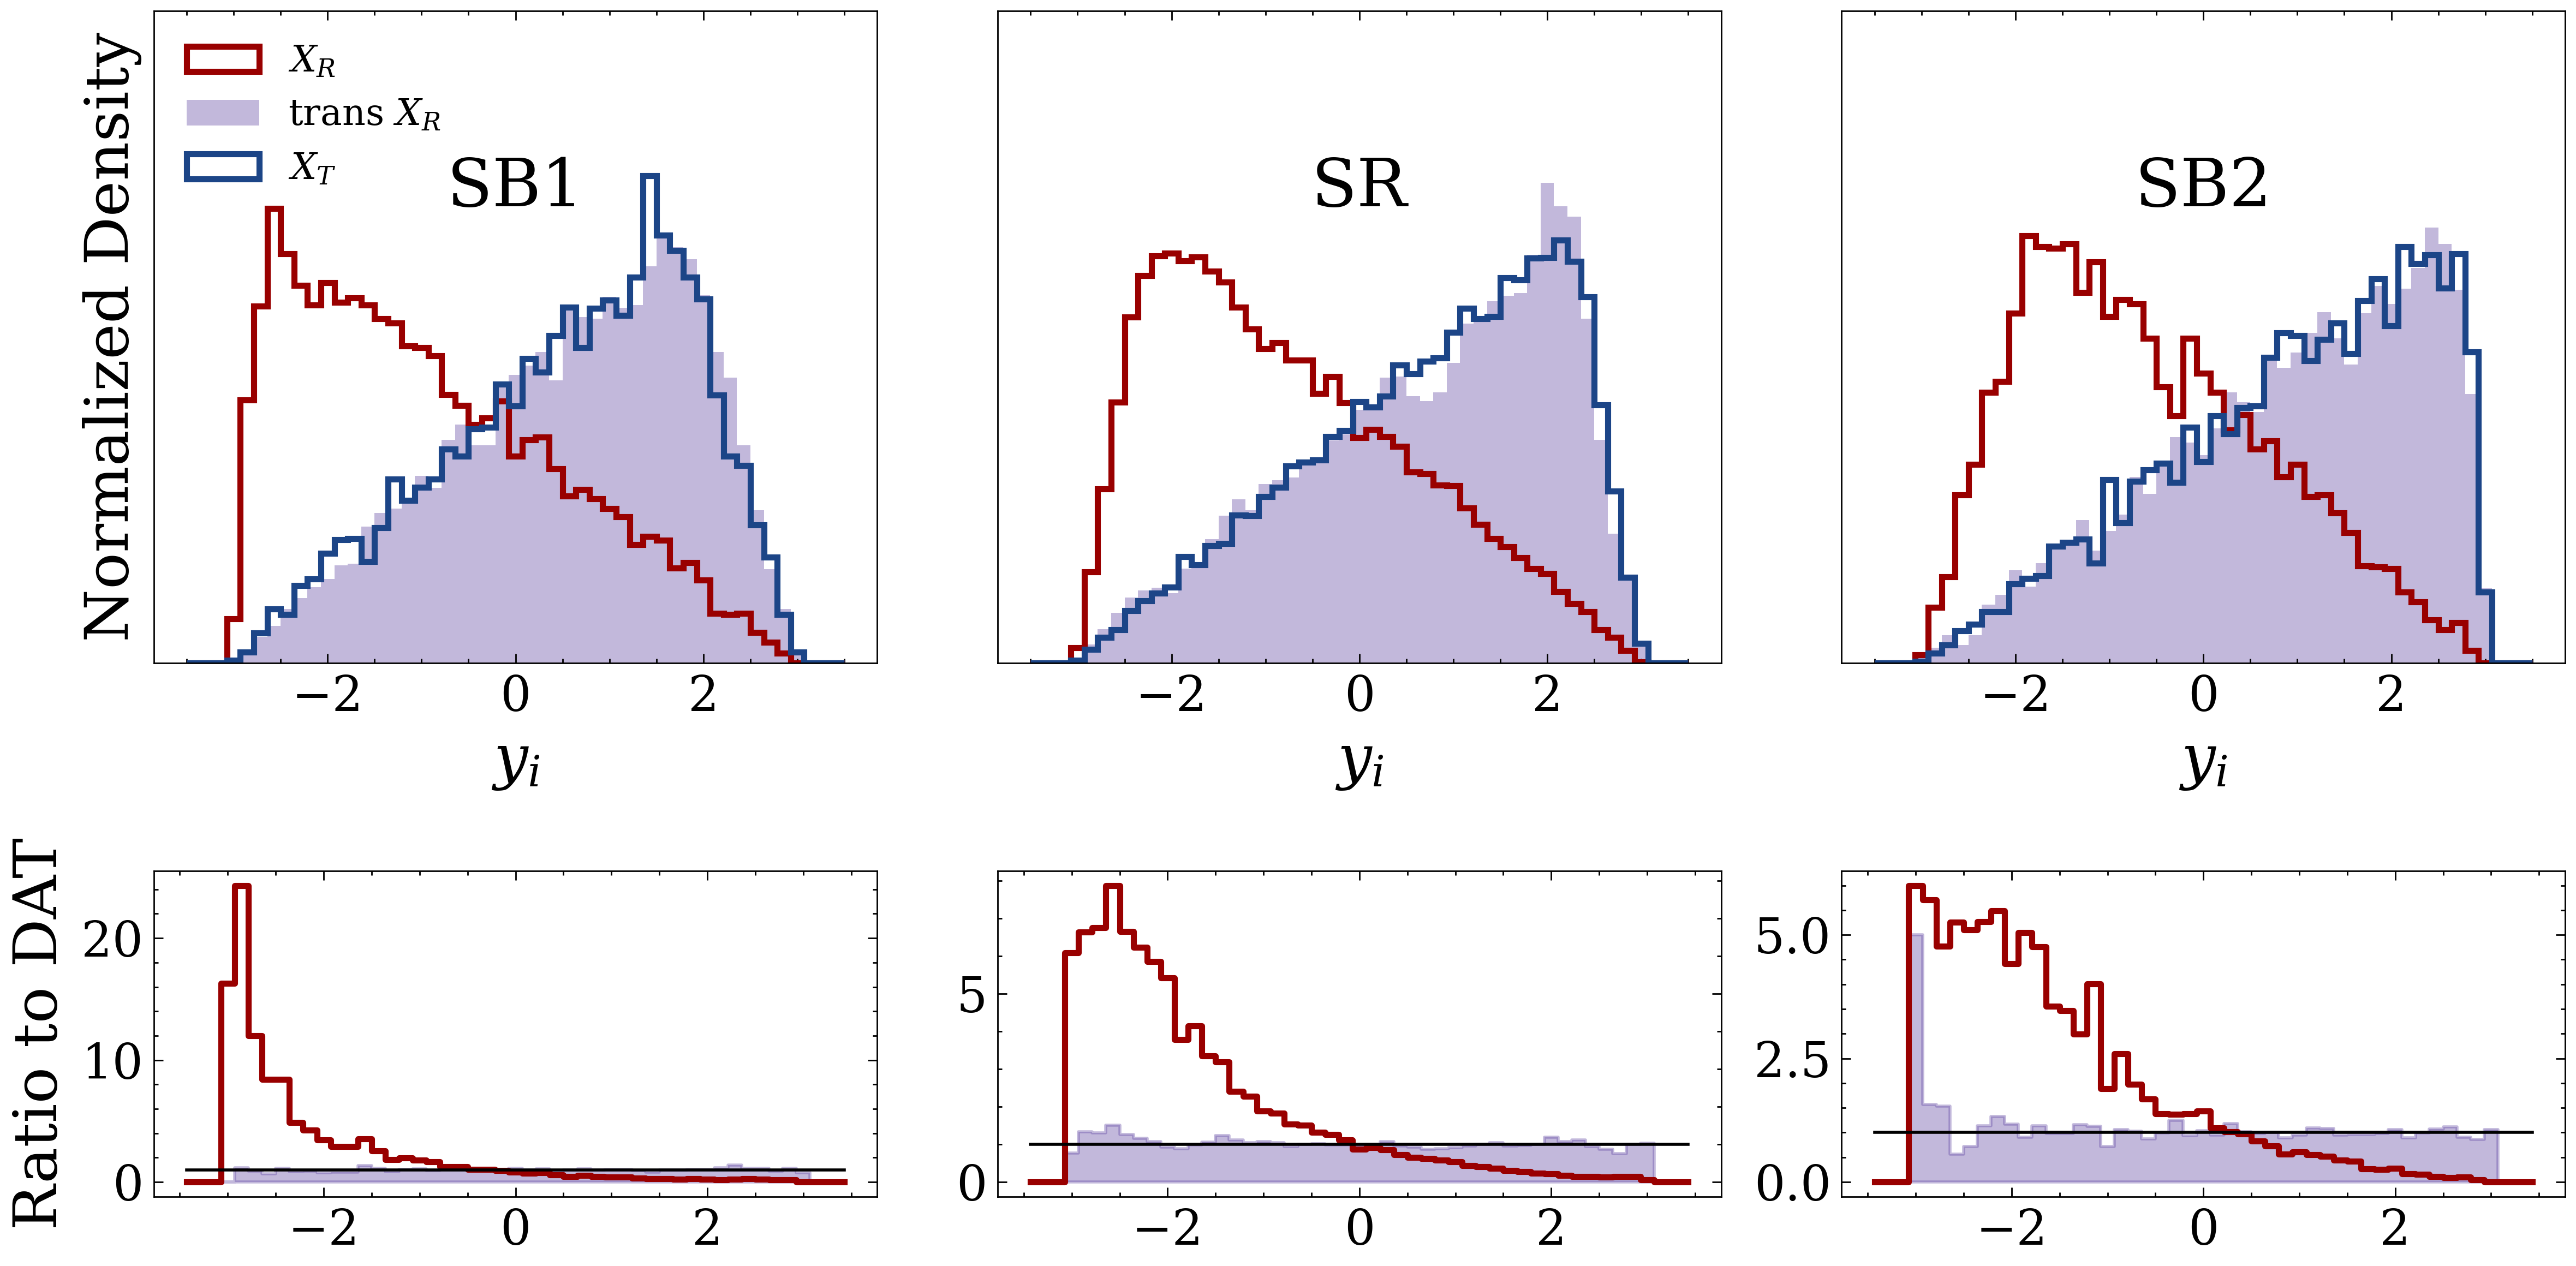

In [6]:

n_plot = -1

alpha = 0.4

w = 2

fig, ax = plt.subplots(2, 3, figsize = (12, 6), gridspec_kw={'height_ratios': [2, 1]})

band_labels = ["SB1", "SR", "SB2"]

for i, band in enumerate(bands_to_plot):
    


    # Plots hists
    ax[0, i].hist(sim_samples[band][:n_plot,0], bins = binning_scheme, label = "$X_R$", histtype = "step", color = sim_color, density = True, linewidth = w)
    ax[0, i].hist(transformed_sim_samples[band][:n_plot,0], bins = binning_scheme, label = "trans $X_R$", histtype = "bar", alpha = alpha, color = trans_color, density = True)
    ax[0, i].hist(dat_samples[band][:n_plot,0], bins = binning_scheme, label = "$X_T$", histtype = "step", color = dat_color, density = True, linewidth = w)
    ax[0, i].set_xlabel("$y_i$")

    ax[0, i].set_yticks([])

    # Plot ratios
    sim_hist, _ = np.histogram(sim_samples[band][:n_plot,0], bins = binning_scheme, density = True)
    trans_sim_hist, _ = np.histogram(transformed_sim_samples[band][:n_plot,0], bins = binning_scheme, density = True)
    dat_hist, _ = np.histogram(dat_samples[band][:n_plot,0], bins = binning_scheme, density = True)

    sim_ratio = np.divide(sim_hist, dat_hist, out=np.zeros_like(sim_hist), where=dat_hist!=0)
    trans_sim_ratio = np.divide(trans_sim_hist, dat_hist, out=np.zeros_like(trans_sim_hist), where=dat_hist!=0)

    bin_centers = 0.5*(binning_scheme[1:] + binning_scheme[:-1])
    width = bin_centers[1] - bin_centers[0]

    ax[1, i].step(bin_centers, sim_ratio, color = sim_color, where = "mid", label = "SIM/DAT", linewidth = w)
    ax[1, i].fill_between(bin_centers, trans_sim_ratio, step="mid", alpha = alpha, label = "(trans SIM)/DAT", color = trans_color)
    ax[1, i].plot(bin_centers, np.full(bin_centers.shape, 1), color = "black")

        
    ax[0, 0].set_ylabel("Normalized Density")  
    ax[1, 0].set_ylabel("Ratio to DAT")
    
    ax[0, i].text(0, .35, band_labels[i], fontsize = 22, ha = "center")
    
    ax[0, 0].legend(fontsize = 12, loc = "upper left")
    ax[0, i].set_ylim(0, .5)

plt.tight_layout()
fig.savefig(f"paper_plots/toy_results.pdf", dpi = dpi)
fig.show()


    
    


   



# LHC plots

In [7]:
curtains_dir = "/global/home/users/rrmastandrea/CURTAINS_SALAD/"

n_features = 5
dataset_config_string = f"LHCO_0sig_f/"

exp_dir = os.path.join(curtains_dir, dataset_config_string)
data_dir = os.path.join(exp_dir, "data")


   
# dataset generation parameters
context_endpoints = (2500, 4500)

bands_dict = {"sb1": [2900, 3300],
                  "sr" : [3300, 3700],
                  "sb2": [3700, 4100],
            }

binning_scheme = np.linspace(-3., 3., 50)

n_features = 5

feature_labels = ["$m_{J_1}$ [GeV]", "$\Delta m_{JJ}$ [GeV]", "$\\tau^{21}_{J_1}$", "$\\tau^{21}_{J_2}$", "$\Delta R_{JJ}$", "$m_{JJ}$ [GeV]"]


## features

In [8]:
# get the data

df_sim = get_lhco(sim_type = "herwig")
data_sim = select_lhco_features(df_sim, feature_type = 0).to_numpy()

df_dat = get_lhco(sim_type = "pythia")
data_dat = select_lhco_features(df_dat, feature_type = 0).to_numpy()

df_signal = get_lhco(sim_type = "pythia", sm = "signal")
data_signal = select_lhco_features(df_signal, feature_type = 0).to_numpy()


events_anomalydetection_herwig_features.h5
events_anomalydetection_v2.features.h5
events_anomalydetection_v2.features.h5


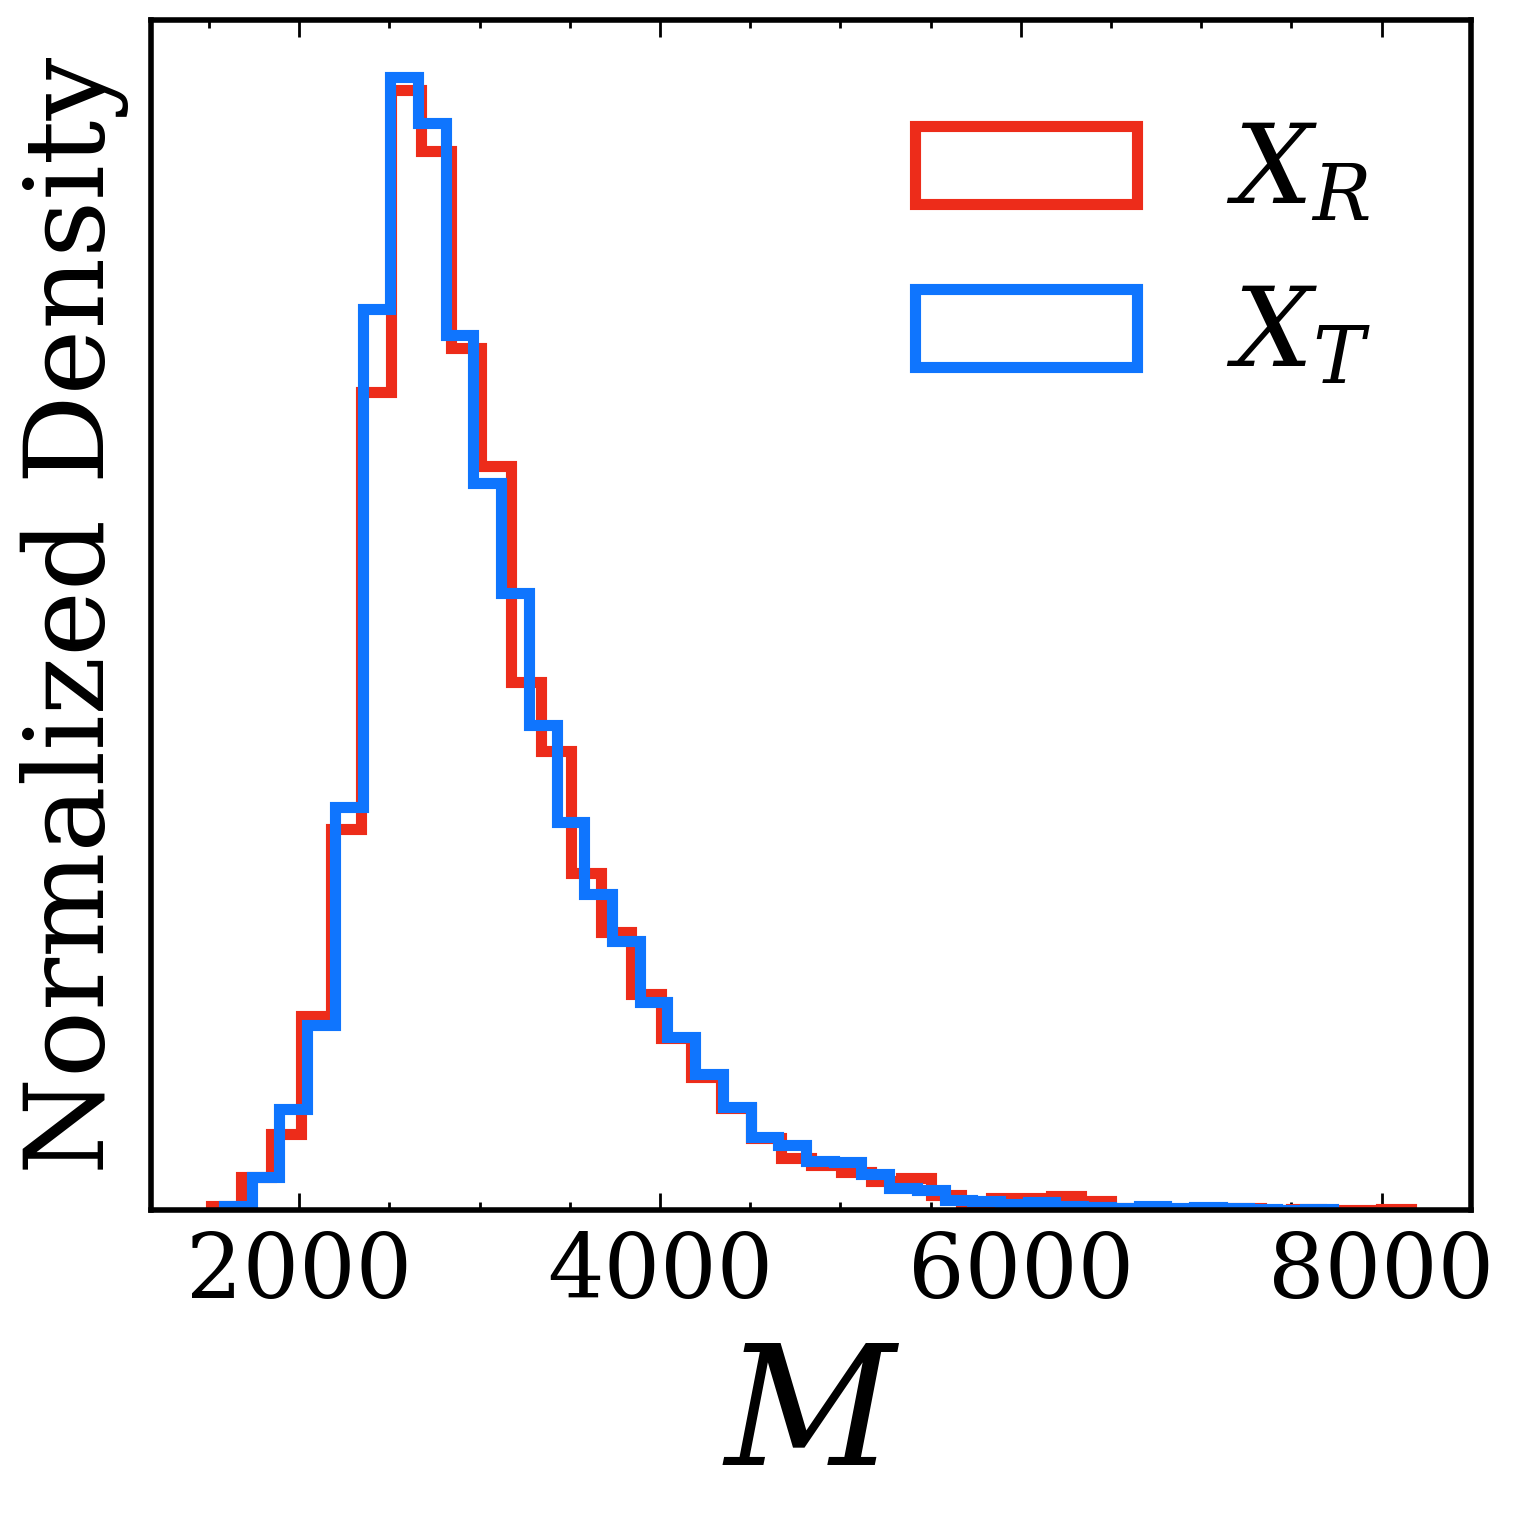

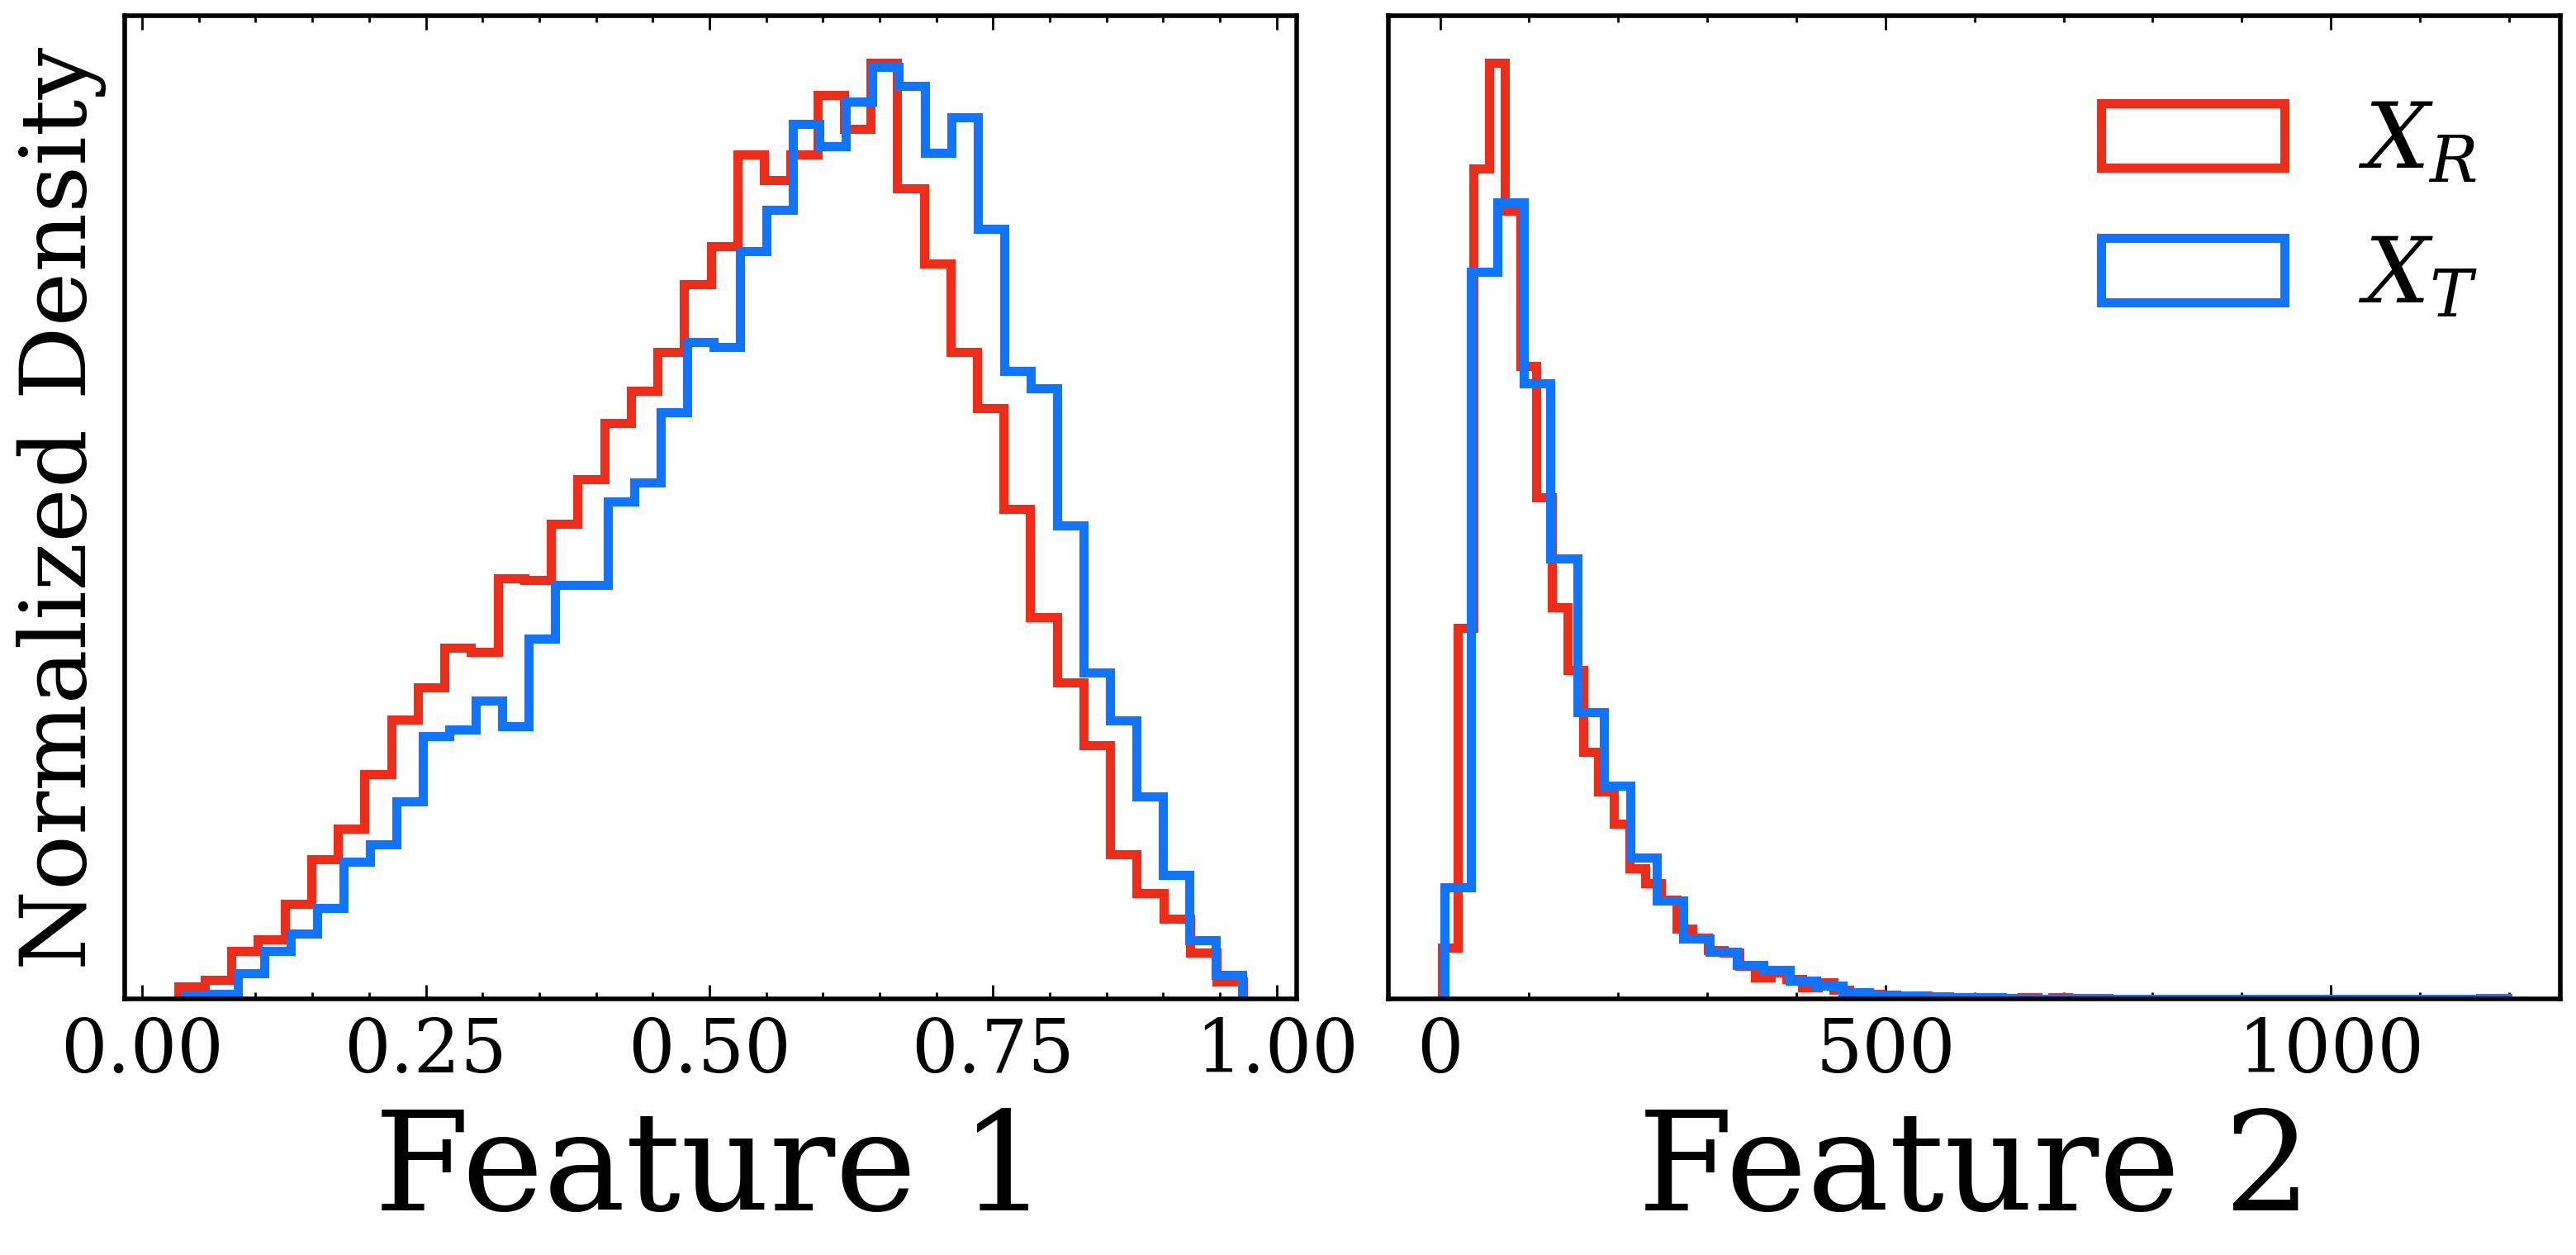

In [11]:
# features plots

alpha = 0.5
n_plot = 10000
bins = 40
w = 2


import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1 #set the value globally




n_features = 6
    

"""fig, ax = plt.subplots(1, n_features, figsize = (4*n_features, 5))

for i in range(n_features):
    ax[i].hist(data_sim[:n_plot,i], bins = bins, density = True, label = "SIM", histtype = "step", color = sim_color, linewidth = w)
    ax[i].hist(data_dat[:n_plot,i], bins = bins, density = True, label = "DAT", histtype = "step", color = dat_color, linewidth = w)
    ax[i].hist(data_signal[:n_plot,i], bins = bins, density = True, label = "Signal", histtype = "step", color = "green", linewidth = w)

    ax[i].set_xlabel(feature_labels[i], fontsize = 30)
    ax[i].set_yticks([])
    
ax[0].set_ylabel("Normalized Density")  
ax[0].legend(fontsize = 20)  
plt.tight_layout()
fig.savefig("paper_plots/features_w_sig.png", dpi = dpi)
fig.show()

    """


plt.figure(figsize = (4, 4))

plt.hist(data_sim[:n_plot,5], bins = bins, density = True, label = "$X_R$", histtype = "step", color = "#ED2C1A", linewidth = w)
plt.hist(data_dat[:n_plot,5], bins = bins, density = True, label = "$X_T$", histtype = "step", color = "#0F75FE", linewidth = w)

plt.xlabel("$M$", fontsize = 30)
plt.yticks([])

plt.ylabel("Normalized Density")  
plt.legend(fontsize = 20)  
plt.tight_layout()
plt.savefig("paper_plots/M.png", dpi = dpi)
plt.show()


fig, ax = plt.subplots(1, 2, figsize = (8, 4))


ax[0].hist(data_sim[:n_plot,2], bins = bins, density = True, label = "$X_R$", histtype = "step", color = "#ED2C1A", linewidth = w)
ax[0].hist(data_dat[:n_plot,2], bins = bins, density = True, label = "$X_T$", histtype = "step", color = "#0F75FE", linewidth = w)
ax[0].set_xlabel("Feature 1", fontsize = 30)
ax[0].set_yticks([])

ax[1].hist(data_sim[:n_plot,0], bins = bins, density = True, label = "$X_R$", histtype = "step", color = "#ED2C1A", linewidth = w)
ax[1].hist(data_dat[:n_plot,0], bins = bins, density = True, label = "$X_T$", histtype = "step", color = "#0F75FE", linewidth = w)
ax[1].set_xlabel("Feature 2", fontsize = 30)
ax[1].set_yticks([])

ax[0].set_ylabel("Normalized Density")  
ax[1].legend(fontsize = 20)  
plt.tight_layout()
fig.savefig("paper_plots/features_nips.png", dpi = dpi)
fig.show()

   



# results (0 sig)

In [6]:
seed = 1

num_layers_BD_sim = 1
num_blocks = 15
num_hidden_features_BD_sim = 128


loc_id_BD_sim = f"BD_sim_Masked_PRQ_AR_{num_layers_BD_sim}layers_{num_hidden_features_BD_sim}hidden_{num_blocks}blocks_{seed}seed"
BD_sim_training_dir = os.path.join(exp_dir, f"saved_models_{loc_id_BD_sim}/")

num_layers_s2d = 2
num_nodes_s2d = 16

loc_id_s2d = f"PRQ_Coupling_{num_layers_s2d}layers_{num_nodes_s2d}nodes_{seed}seed"
s2d_training_dir = os.path.join(BD_sim_training_dir, f"saved_models_{loc_id_s2d}/")
s2d_samples_dir = os.path.join(s2d_training_dir, f"npy_samples/")


    
sim_samples = {}
transformed_sim_samples = {}
dat_samples = {}

for band in list(bands_dict.keys()):
    # sim
    sim_samples[band] = np.load(os.path.join(s2d_samples_dir, f"{band}_SIM.npy"))
    # trans sim
    transformed_sim_samples[band] = np.load(os.path.join(s2d_samples_dir, f"{band}_transSIM.npy"))
    # dat
    dat_samples[band] = np.load(os.path.join(s2d_samples_dir, f"{band}_DAT.npy"))
    
    
bands_to_plot = list(bands_dict.keys())



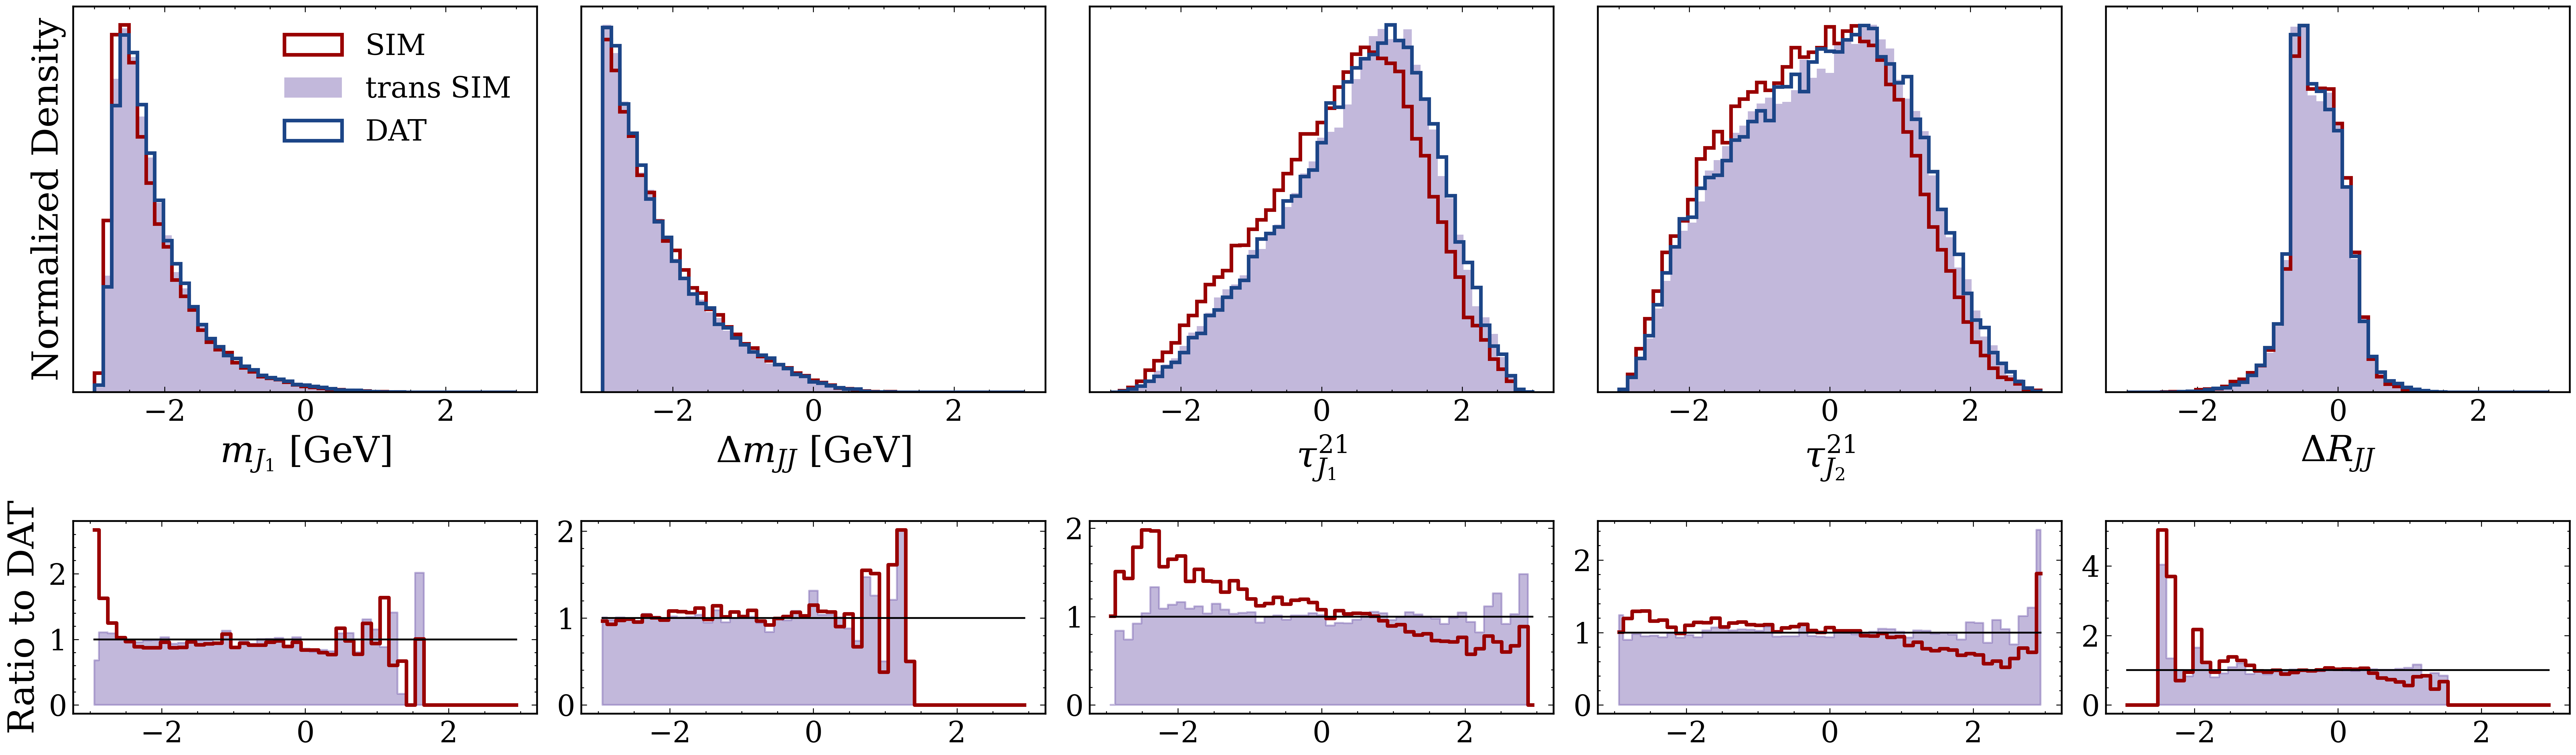

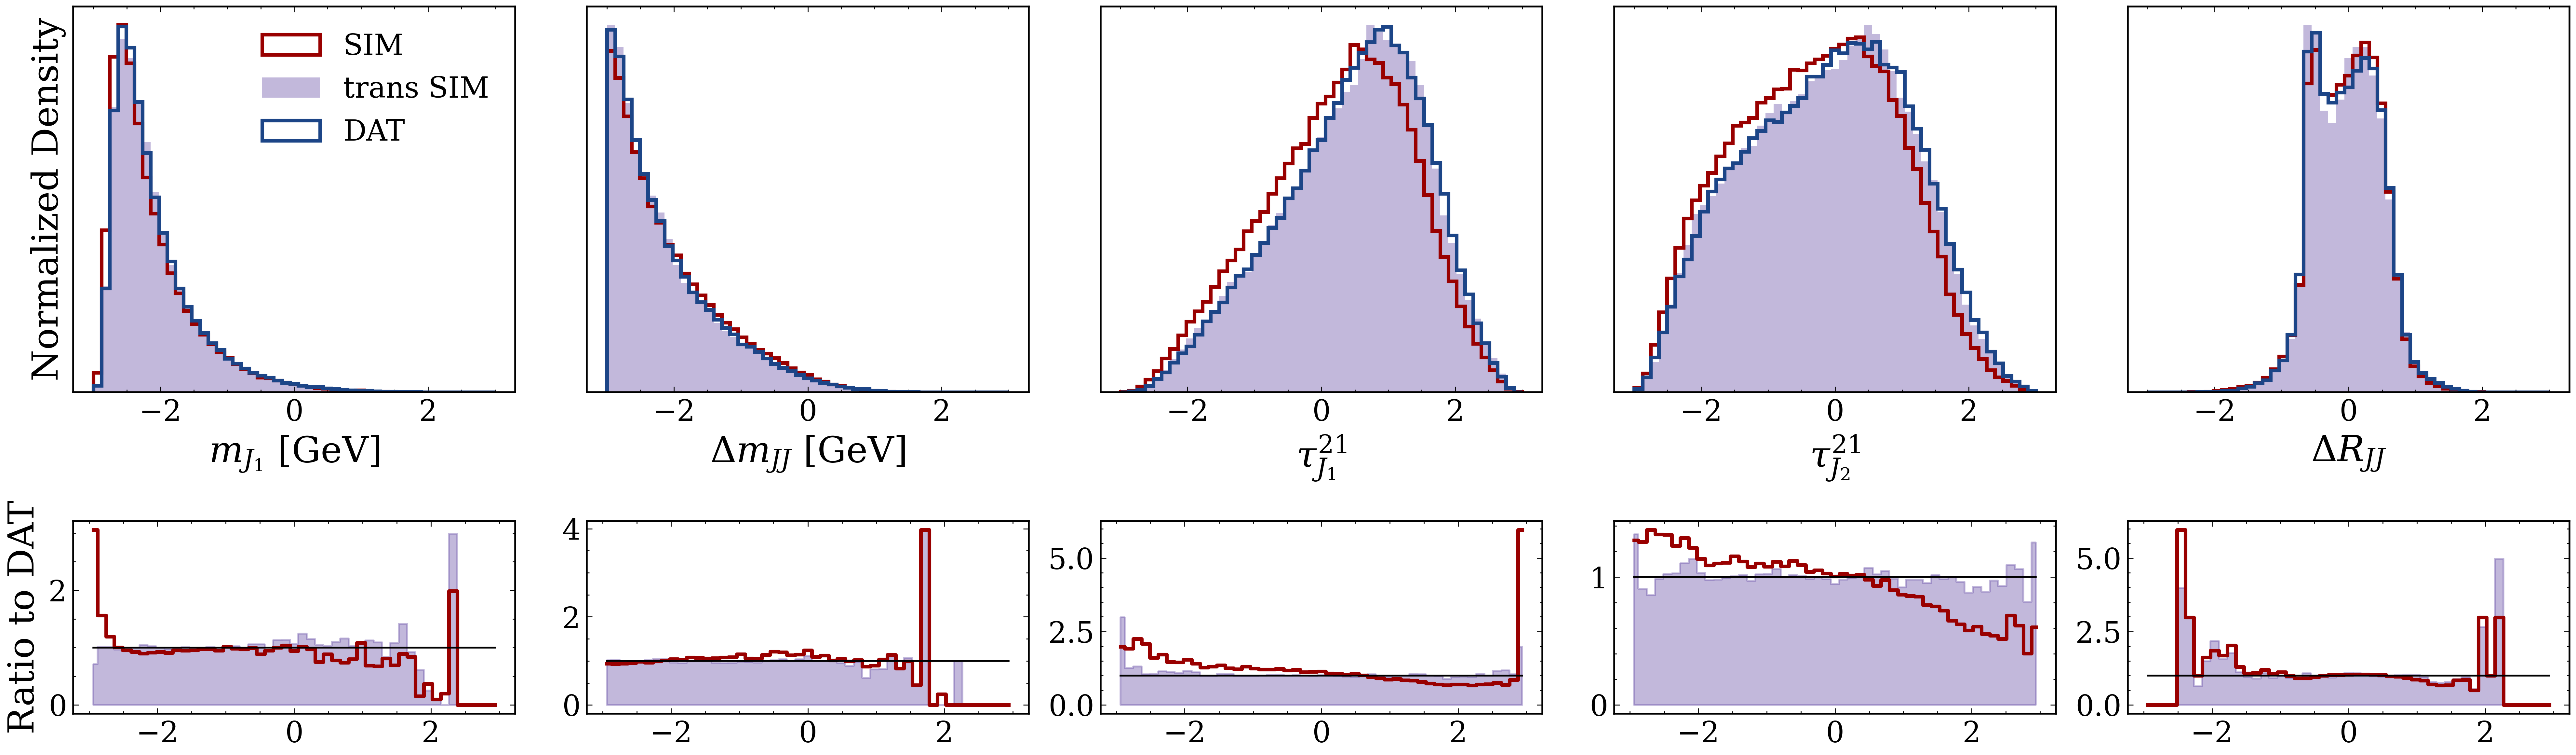

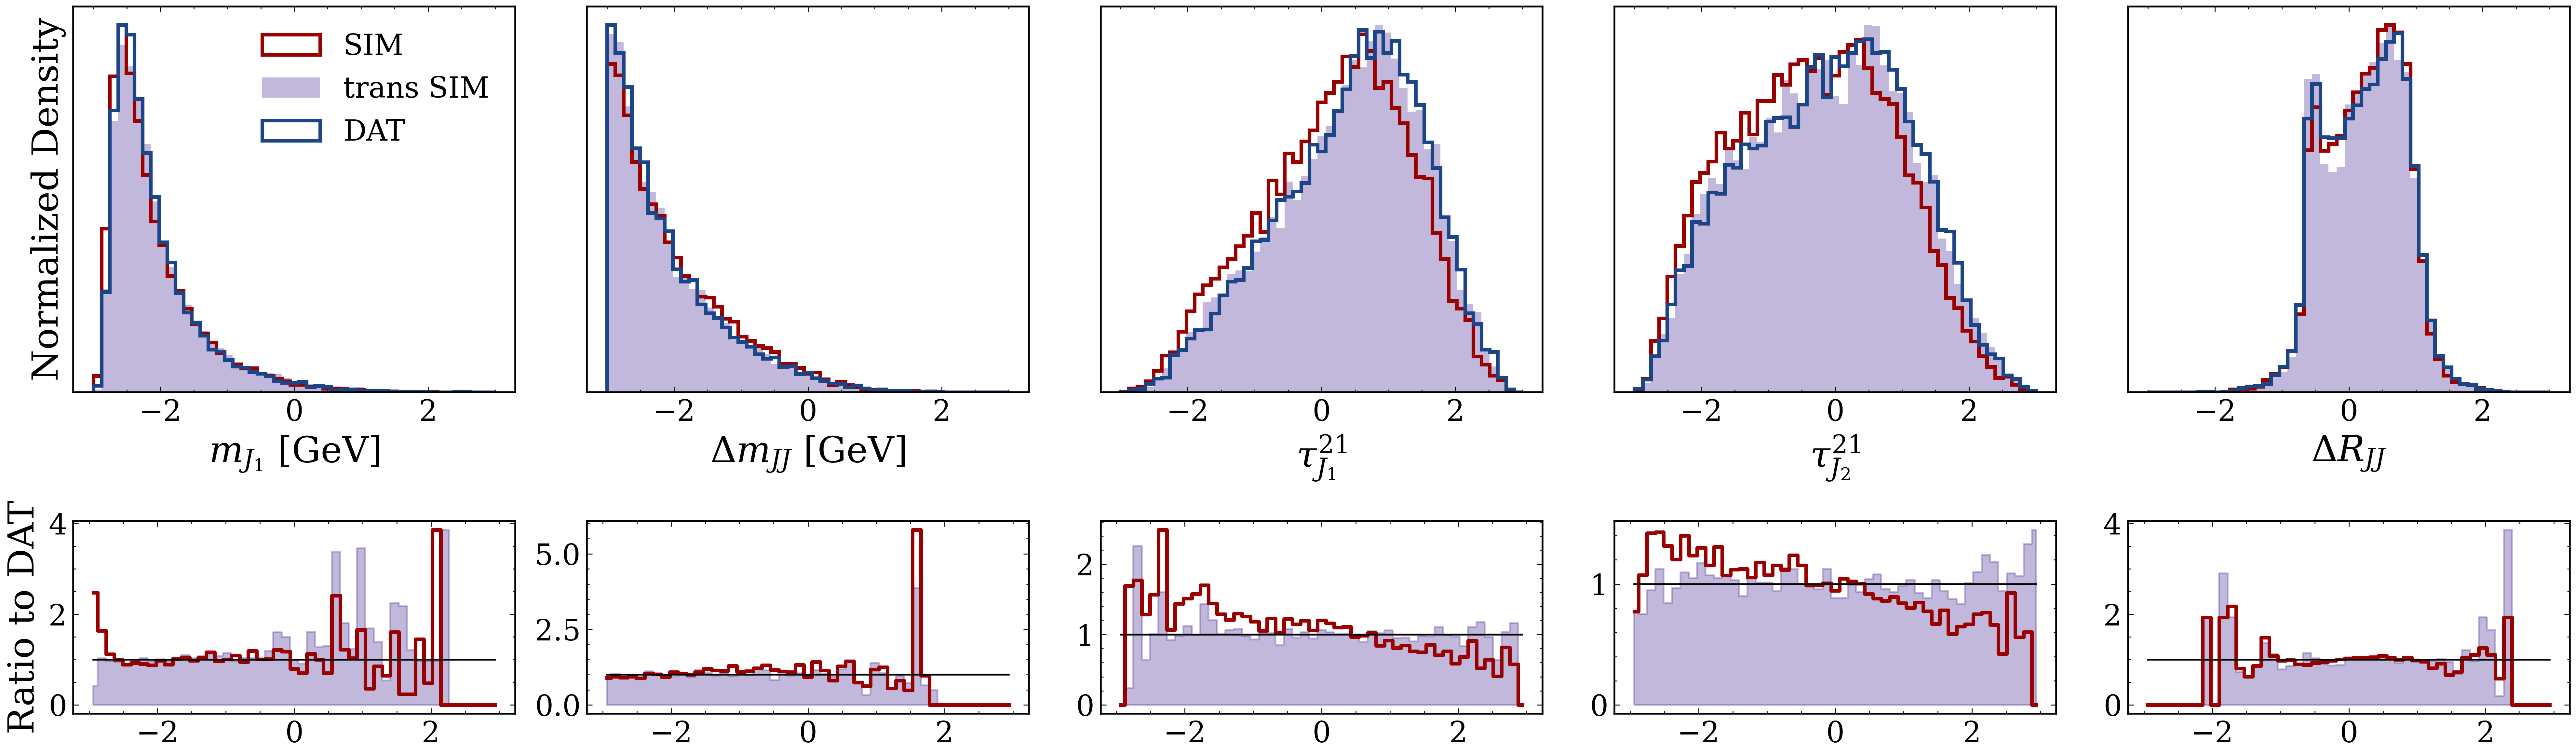

In [7]:

n_plot = -1

alpha = 0.4
n_features = 5

for band in bands_to_plot:
    

    fig, ax = plt.subplots(2, n_features, figsize = (4*(n_features), 6), gridspec_kw={'height_ratios': [2, 1]})
    for i in range(n_features):

        # Plots hists
        ax[0, i].hist(sim_samples[band][:n_plot,i], bins = binning_scheme, label = "SIM", histtype = "step", color = sim_color, density = True, linewidth = w)
        ax[0, i].hist(transformed_sim_samples[band][:n_plot,i], bins = binning_scheme, label = "trans SIM", histtype = "bar", alpha = alpha, color = trans_color, density = True)
        ax[0, i].hist(dat_samples[band][:n_plot,i], bins = binning_scheme, label = "DAT", histtype = "step", color = dat_color, density = True, linewidth = w)
        ax[0, i].set_xlabel(feature_labels[i])
        
        ax[0, i].set_yticks([])

        # Plot ratios
        sim_hist, _ = np.histogram(sim_samples[band][:n_plot,i], bins = binning_scheme, density = True)
        trans_sim_hist, _ = np.histogram(transformed_sim_samples[band][:n_plot,i], bins = binning_scheme, density = True)
        dat_hist, _ = np.histogram(dat_samples[band][:n_plot,i], bins = binning_scheme, density = True)

        sim_ratio = np.divide(sim_hist, dat_hist, out=np.zeros_like(sim_hist), where=dat_hist!=0)
        trans_sim_ratio = np.divide(trans_sim_hist, dat_hist, out=np.zeros_like(trans_sim_hist), where=dat_hist!=0)

        bin_centers = 0.5*(binning_scheme[1:] + binning_scheme[:-1])
        width = bin_centers[1] - bin_centers[0]

        ax[1, i].step(bin_centers, sim_ratio, color = sim_color, where = "mid", label = "SIM/DAT", linewidth = w)
        ax[1, i].fill_between(bin_centers, trans_sim_ratio, step="mid", alpha = alpha, label = "(trans SIM)/DAT", color = trans_color)
        ax[1, i].plot(bin_centers, np.full(bin_centers.shape, 1), color = "black")
        
        
    ax[0, 0].set_ylabel("Normalized Density")  
    ax[1, 0].set_ylabel("Ratio to DAT")
    
    ax[0, 0].legend()

    plt.tight_layout()
    fig.savefig(f"paper_plots/results_{band}.pdf", dpi = dpi)
    fig.show()
    

    
    


   



## nice schematic

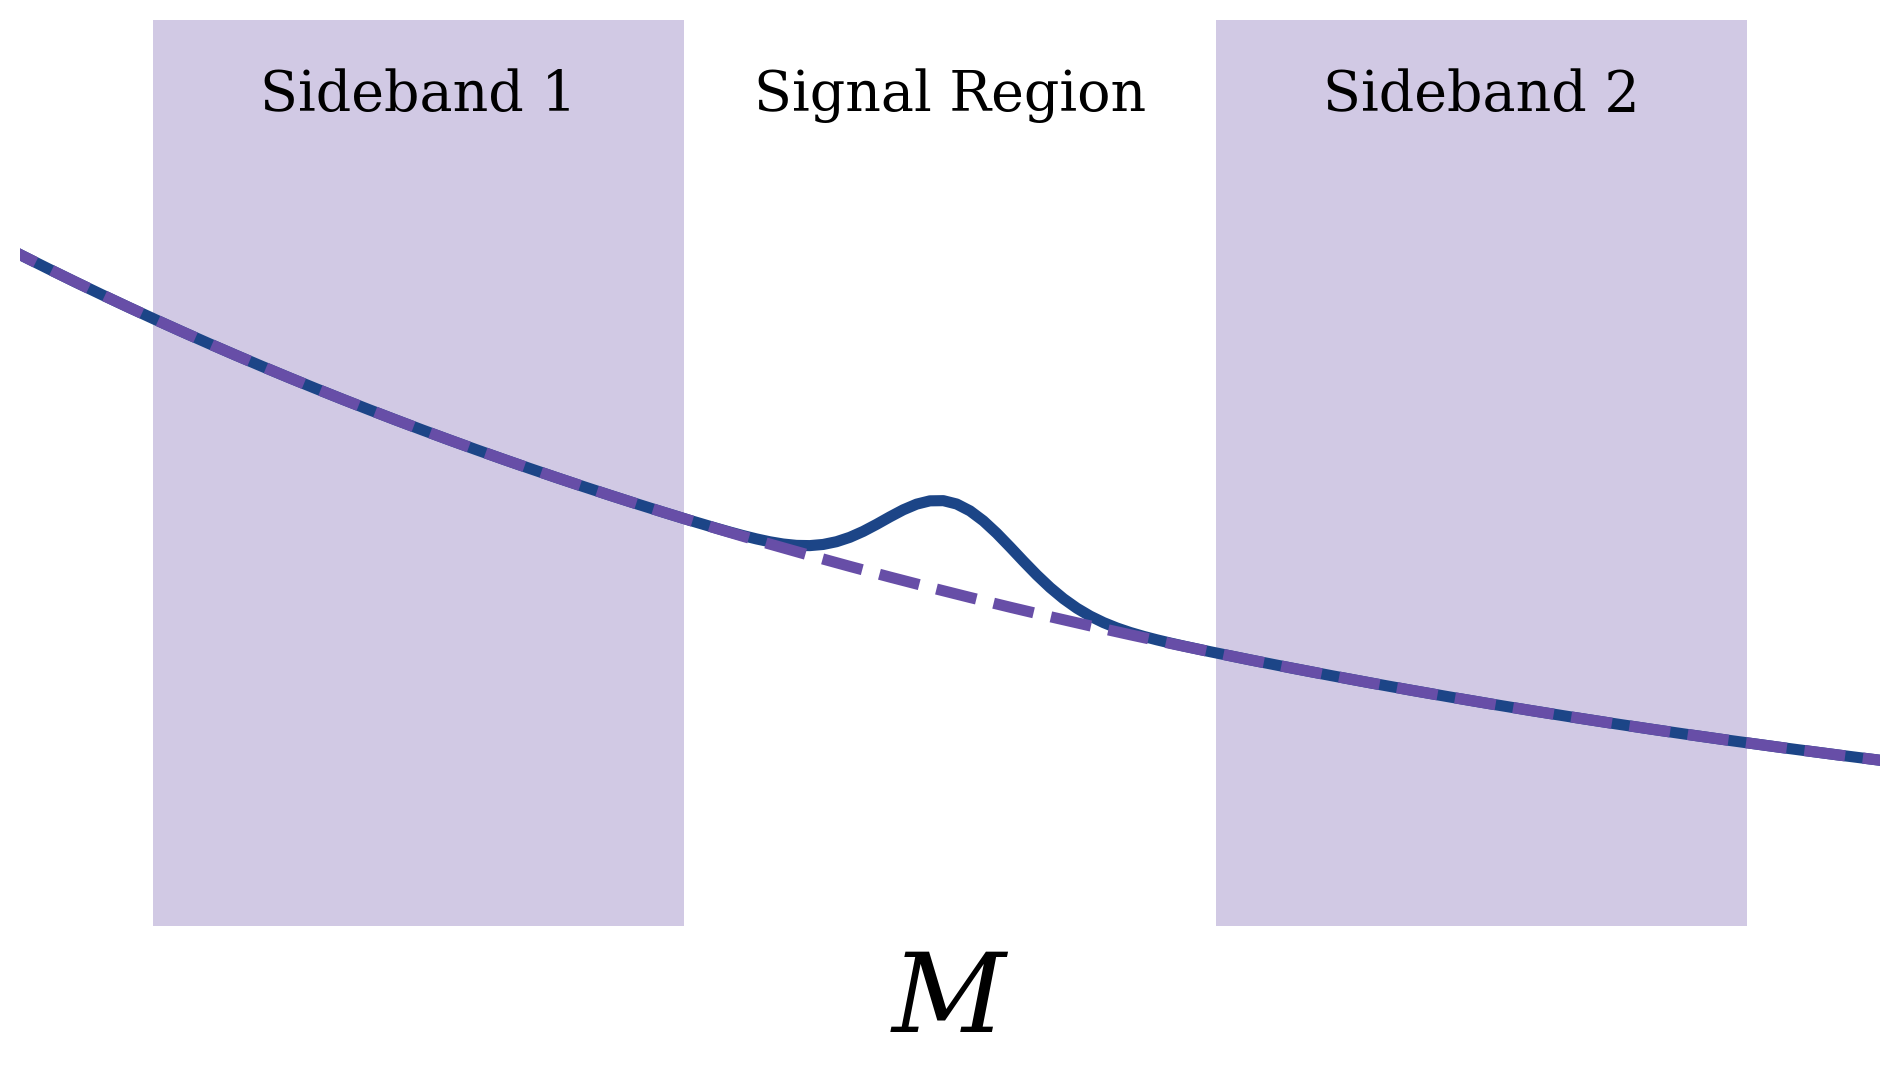

In [6]:
def exp(x, alpha, N):
    return N*np.exp(-alpha*x)

def signal(x, alpha, N, mu, sigma, M):
    return N*np.exp(-alpha*x) + M*np.exp(-0.5*((x-mu)/sigma)**2)

min_range = 0
max_range = 1

n_bkg = 1000
n_sig = 100

x = np.linspace(min_range, max_range, 200)
w = 2
alpha = 0.3

fig = plt.figure(figsize = (6, 3))





# signal
plt.plot(x, signal(x, 2, n_bkg, .5, .025, n_sig), color = dat_color, linewidth = 2)

# background
plt.plot(x, signal(x, 2, n_bkg, .5, .025, 0), color = trans_color, linewidth = 2, linestyle = "dashed")


# SB1
plt.fill_between([.2, .4], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.3, 900, "Sideband 1", color = "black", ha = "center")
# SB2
plt.fill_between([.6, .8], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.7, 900, "Sideband 2", color = "black", ha = "center")

# SR
plt.text(.5, 900 , "Signal Region", color = "black", ha = "center")


plt.xlabel("$M$")
plt.xlim(0.15, 0.85)
plt.ylim(0, 1000)
plt.xticks([])
plt.yticks([])
ax = plt.gca()
plt.setp(ax.spines.values(), visible=False)

fig.savefig("paper_plots/schematic_1.png", dpi = dpi)





plt.show()

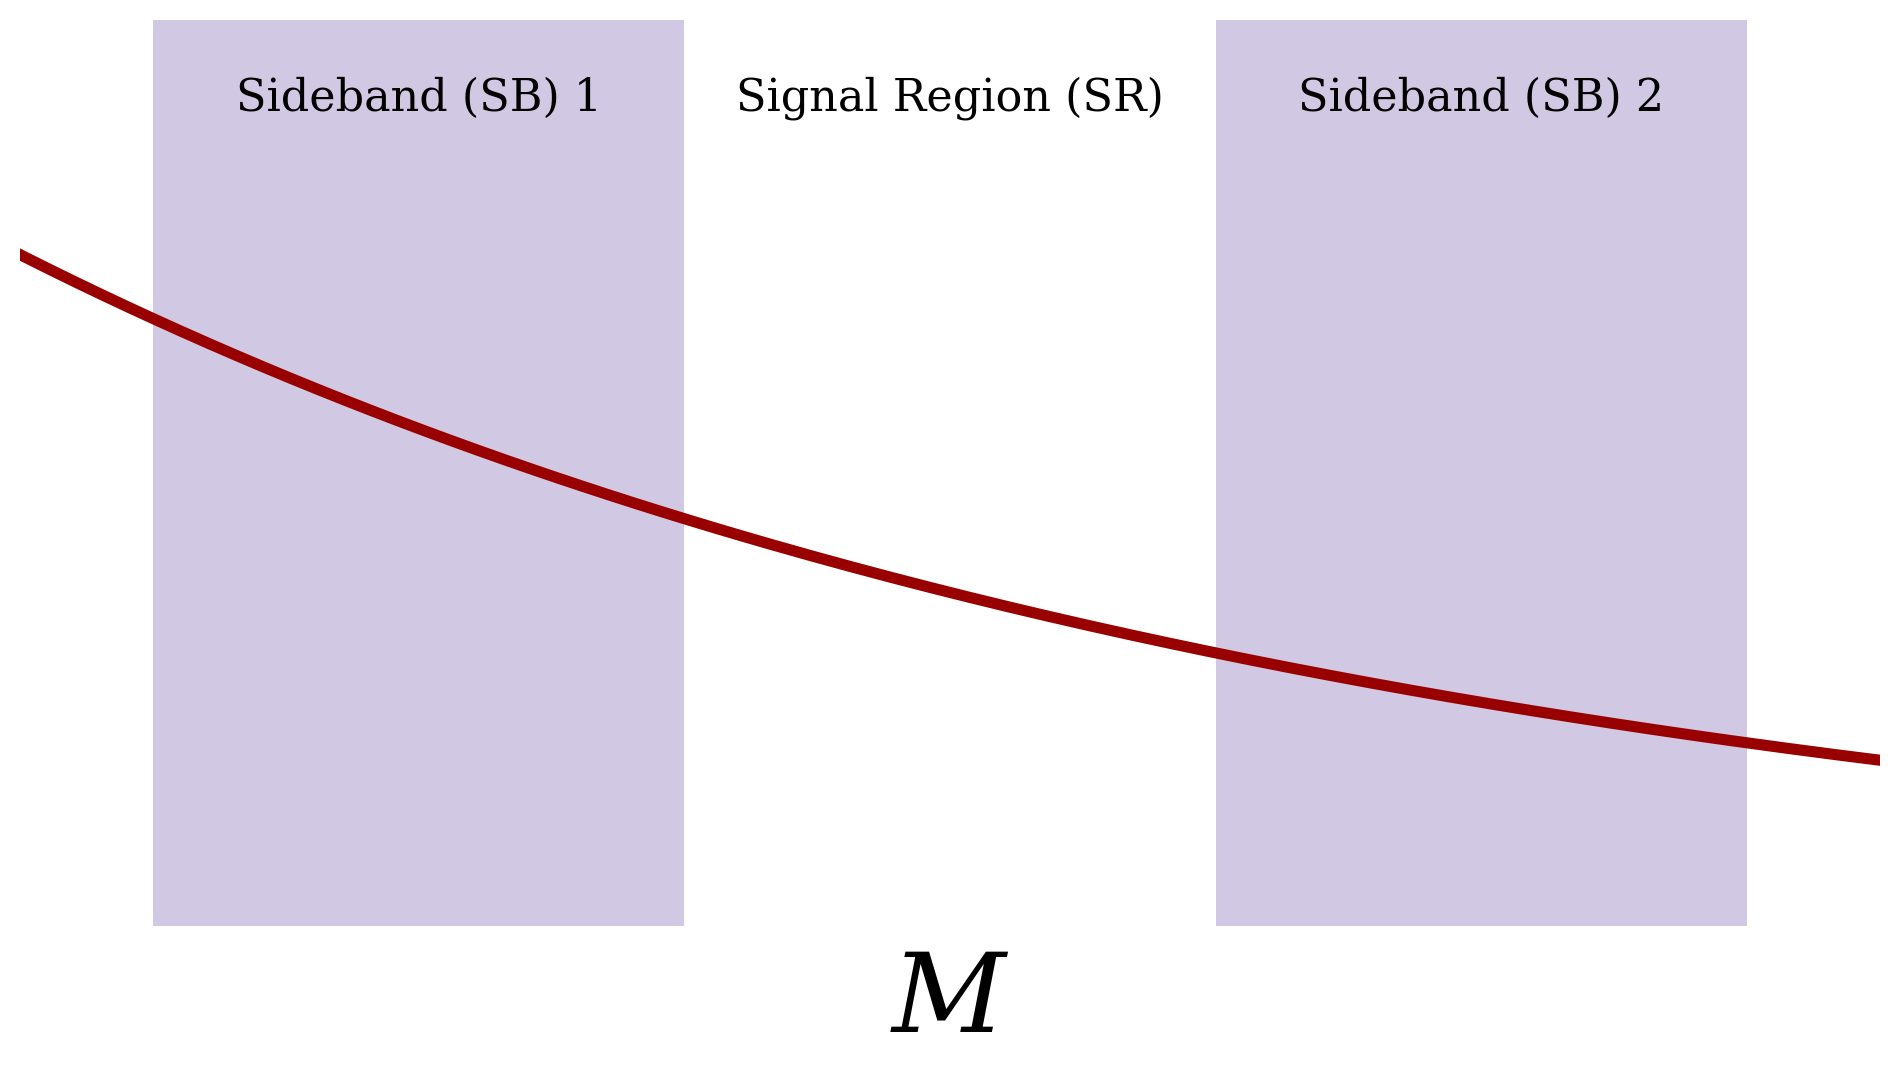

In [12]:
fig = plt.figure(figsize = (6, 3))

# background
#plt.plot(x, exp(x, 2, n_bkg))

# signal
plt.plot(x, signal(x, 2, n_bkg, .5, .025, 0), color = sim_color, linewidth = 2)

# SB1
plt.fill_between([.2, .4], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.3, 900, "Sideband (SB) 1", color = "black", ha = "center", fontsize = 8)
# SB2
plt.fill_between([.6, .8], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.7, 900, "Sideband (SB) 2", color = "black", ha = "center", fontsize = 8)

# SR
plt.text(.5, 900 , "Signal Region (SR)", color = "black", ha = "center", fontsize = 8)


plt.xlabel("$M$")
plt.xlim(0.15, 0.85)
plt.ylim(0, 1000)
plt.xticks([])
plt.yticks([])
ax = plt.gca()
plt.setp(ax.spines.values(), visible=False)

fig.savefig("paper_plots/schematic_2.png", dpi = dpi)


plt.show()

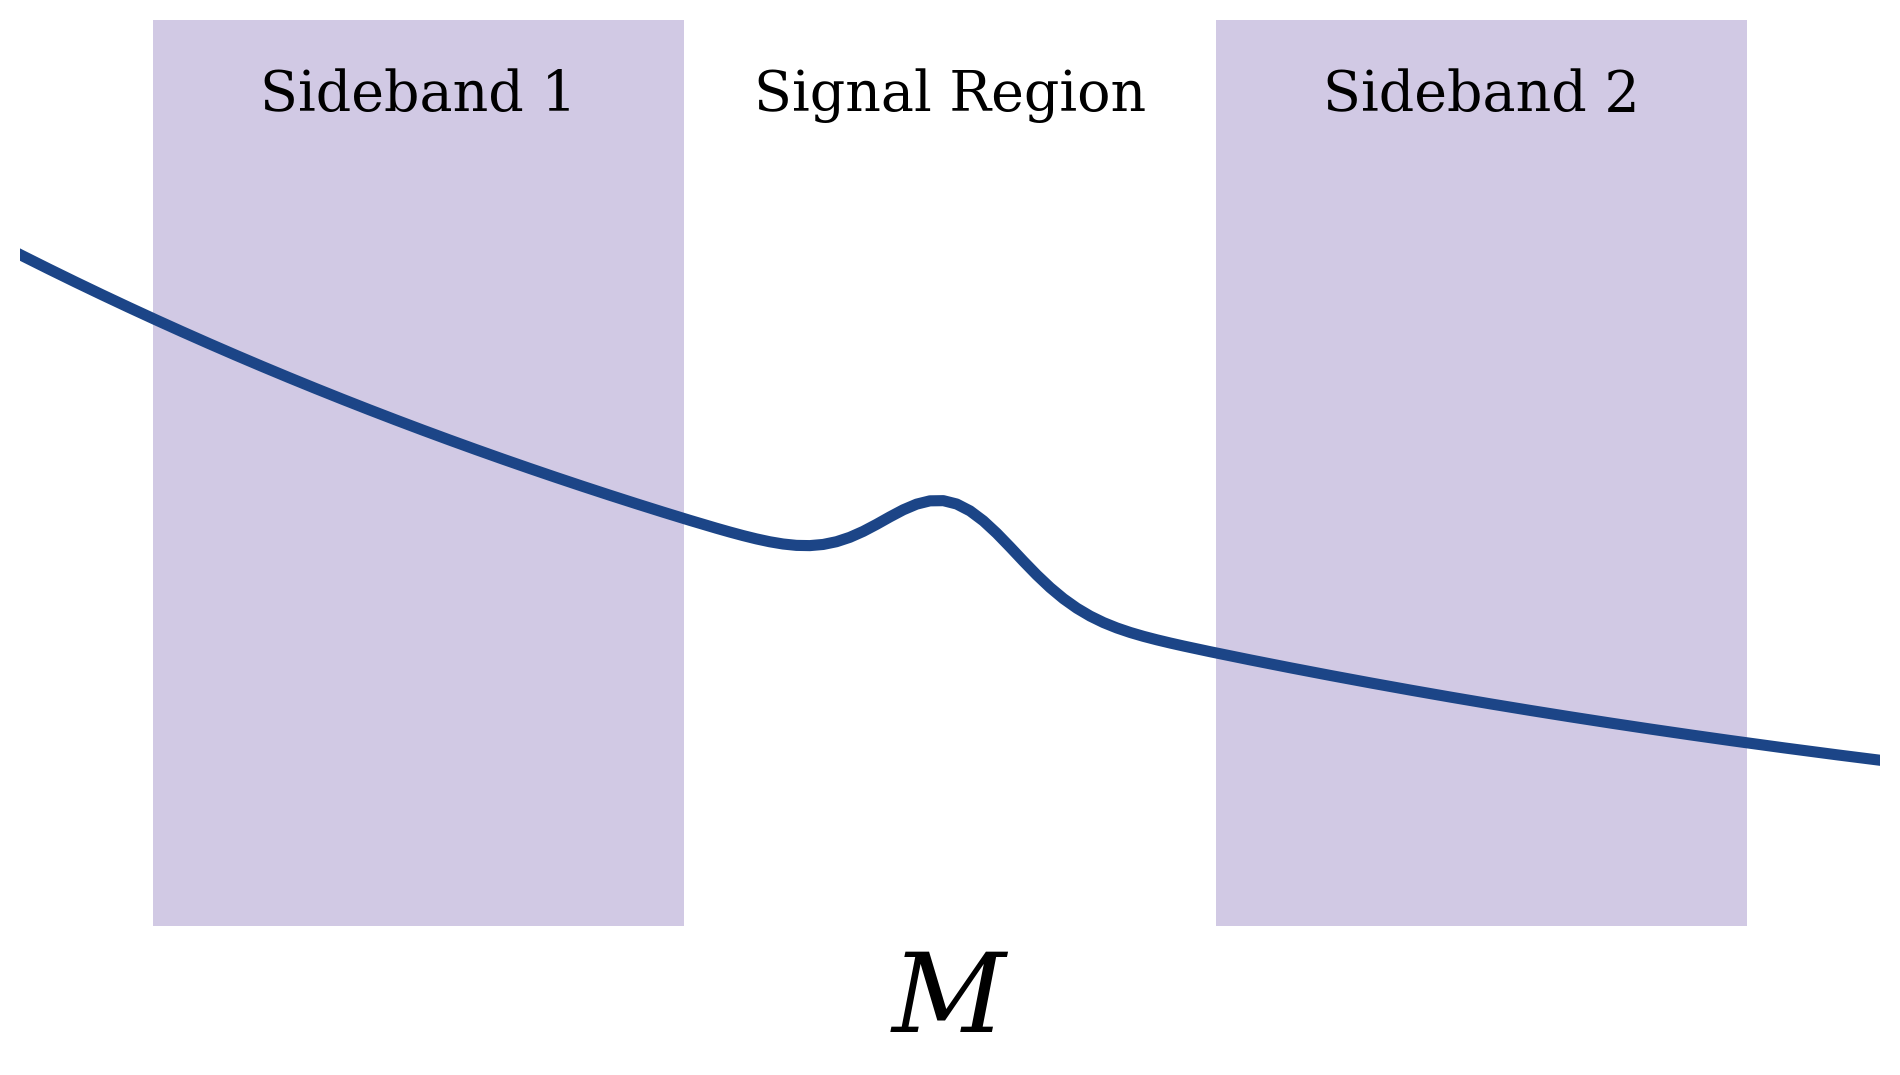

In [8]:

fig = plt.figure(figsize = (6, 3))



# signal
plt.plot(x, signal(x, 2, n_bkg, .5, .025, n_sig), color = dat_color, linewidth = 2)

# background


# SB1
plt.fill_between([.2, .4], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.3, 900, "Sideband 1", color = "black", ha = "center")
# SB2
plt.fill_between([.6, .8], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.7, 900, "Sideband 2", color = "black", ha = "center")

# SR
plt.text(.5, 900 , "Signal Region", color = "black", ha = "center")


plt.xlabel("$M$")
plt.xlim(0.15, 0.85)
plt.ylim(0, 1000)
plt.xticks([])
plt.yticks([])
ax = plt.gca()
plt.setp(ax.spines.values(), visible=False)
fig.savefig("paper_plots/schematic_3.png", dpi = dpi)


plt.show()

Plot sic curves

TODO work out the seed averaging